## Examen 3
1. Considere una matrix $A$, $3\times 3$ real, que se pueda diagonalizar con una transformación del  tipo
\begin{align}
  A_{\text{diag}}=P^T\cdot A \cdot U\,,
\end{align}
donde $P$ es una matrix de permutación ortogonal, es decir, de entradas 0 y $\pm 1$, y $U$ es una matriz de rotación en términos de tres ángulos de mezcla: $\theta_{12}$, $\theta_{23}$, $\theta_{13}$
\begin{align*}                                                                  
U=\begin{bmatrix}                                                                 
c_{12}c_{13}                    &s_{12}c_{13}                & s_{13}  \\       
-s_{12}c_{23}-c_{12}s_{23}s_{13}  & c_{12}c_{23}-s_{12}s_{23}s_{13}& s_{23}c_{13}\\                            s_{12}s_{23}-c_{12}c_{23}s_{13}  &-c_{12}s_{23}-s_{12}c_{23}s_{13}& c_{23}c_{13}\\ 
\end{bmatrix}                                                                   
\end{align*}
donde $c_{12}=\cos\theta_{12}$, etc. Construya una función de python, que acepte como entrada una matrix, y entrege como salida los tres autovectores ordenados de mayor a menor y los tres ángulos de mezcla en grados.  Aplique dicha función sobre la matrix:
```
A=np.array( [
 [7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
 [2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
 [6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )
```
3. Grafique el espacio de configuración elongación-velocidad, de una masa $m=1\ $Kg  en el extremo de un resorte de constante elástica $k=1\ $N/m sometida a una fuerza de fricción proporcional a velocidad con coeficiente de fricción $b=1/3\ $N$\cdot$s/m. Considere elongaciónes iniciales en el intervalo $-1\ $m a $1\ $m y velocidades iniciales entre $-1\ $m/s y $1\ $m/s

# 1.

In [1]:
%pylab inline
from scipy import integrate
from random import random

Populating the interactive namespace from numpy and matplotlib


Función auxiliar.

In [6]:
def order_index(v,nv):
    order_index=[]
    for i in nv:
        for j in range(0,len(v)):
            if i==v[j]:
                order_index.append(j)
    return order_index

Definiendo la transformación $T$, donde $V=P^{T}$ y $U=U$

In [29]:
def T(m):
    a=np.copy(m)
    V=np.linalg.eig(np.dot(a,a.transpose()))[1]
    UU=np.linalg.eig(np.dot(a.transpose(),a))[1]
    λ0=np.sqrt(np.linalg.eig(np.dot(a.transpose(),a))[0])
    #λ0=np.sqrt(np.linalg.eig(np.dot(a,a.transpose()))[0])
    λ=sorted(λ0,reverse=True)
    indices=order_index(λ,λ0)
    Ur=np.copy(UU)
    
    U=np.hstack(  [ np.reshape( UU[:,indices[0]],(3,1)  ),
                 np.reshape( UU[:,indices[1]],(3,1)  ),
                 np.reshape( UU[:,indices[2]],(3,1)  )] )

    θ13=np.arcsin(U[0][2])
    θ12=np.arcsin(U[0][1]/np.cos(θ13))
    θ23=np.arcsin(U[1][2]/np.cos(θ13))
    θ0=[θ13,θ12,θ23]
    θ=degrees(θ0)
    return λ,θ

In [30]:
A=np.array( [
[7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
[2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
[6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )

In [32]:
l,th=T(A)

Autovalores.

In [33]:
l

[11.0, 3.9999999999999996, 3.0000000000000004]

Ángulos de mezcla, $[ \theta_{13}$, $\theta_{12}$, $\theta_{23}]$

In [34]:
th

array([-44.99991273,   0.14142121, -79.90000015])

# 2.

Parámetros del problema.

In [40]:
m=1 #Kg
k=1 #N/m
b=1/3 #N*s/m

Condiciones iniciales.

In [41]:
x0=uniform(-1,1) #m
v0=uniform(-1,1) #m/s
y0=[x0,v0]

Sabemos que la fuerza sobre el resote es $F=-kx-bv$, donde 
* $k$: constante de elasticidad del resorte.
* $x$: elongación.
* $b$: constante de proporcionalidad.
* $v$: velocidad de la masa.

In [42]:
def dU_dt(U,t,k,b):
    x,v=U
    return [v,-k*x-b*v]

In [57]:
t=np.linspace(0,10,1000)

In [58]:
U=integrate.odeint(dU_dt,y0,t,args=(k,b))

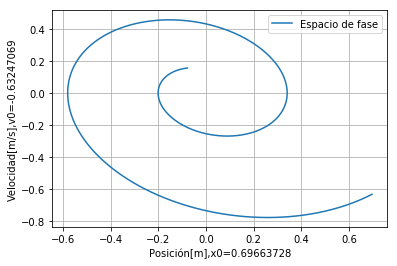

In [72]:
plt.plot(U[:,0],U[:,1],label='Espacio de fase')
plt.xlabel('Posición[m],x0={}'.format(round(x0,8)))
plt.ylabel('Velocidad[m/s],v0={}'.format(round(v0,8)))
plt.legend()
plt.grid()